# Clause Type Analysis

In [1]:
from scripts.imports import *
nt_clause_df = pd.read_csv(
    paths['clause_dataset'],
    index_col='node',
    low_memory=False
)

# bind clauses with time and without together
cl_df = pd.concat([df, nt_clause_df], 0)

# designate some additional parameters for a clause to be "main"

non_main = [
    'InfC', 'InfA', 'Reop', 
    'Voct', 'CPen', 'Ellp', 
    'MSyn',
]

main_df = cl_df[
    (cl_df.cl_rela == 'Main')
    & (~cl_df.cl_type.isin(non_main))
]

out = Exporter(
    paths['outdir'],
    'clause',
)

main_df.shape

(58763, 69)

# Basic cl type statistics

In [2]:
df.columns

Index(['verse', 'book', 'booksuper', 'canon_part', 'period', 'times_etcbc',
       'times_utf8', 'times_utf8d', 'times_POS', 'TA Heads', 'function',
       'quality', 'name', 'text', 'n_times', 'lex_token', 'is_advb', 'tense',
       'genre', 'domain', 'gendom', 'clause', 'sentence', 'cl_rela', 'cl_type',
       'cl_kind', 'verb', 'verb_etcbc', 'verb_utf8', 'verb_text', 'verbform',
       'verb_stem', 'cl_args', 'has_objc', 'has_cmpl', 'has_subj', 'has_oc',
       'cl_type2', 'cl_clust50', 'cl_clust10', 'verbtense', 'vt_order', 'PP',
       'front_etcbc', 'front', 'tag', 'unmodified', 'has_time', 'APPO', 'DEF',
       'ORDN', 'ØPP', 'GP', 'QUANT', 'PL', 'NUM', 'PARA', 'DEMON',
       'demon_type', 'ADJV', 'TIMEAPPO', 'SPEC', 'SFX3', 'SFX', 'DU', 'SFX1',
       'SFX2', 'ADVB', 'CARDC'],
      dtype='object')

In [3]:
df.verbform.value_counts()

yqtl    924
qtl     753
wayq    707
Ø       575
wqtl    262
ptcp    211
infc    125
impv     83
infa      8
Name: verbform, dtype: int64

In [4]:
cltype_cts = df.cl_type2.value_counts()
cltype_pr = cltype_cts / cltype_cts.sum()

cltype_ctpr =\
pd.concat([cltype_cts, (cltype_pr.round(2)*100).astype(int).astype(str)+'%'], 1)

cltype_ctpr.columns = ['count', 'percent']

out.table(
    cltype_ctpr,
    'cltype_cts',
    caption='ETCBC Clause Type Counts with Time Adverbials',
    adjustbox=True,
)


cltype_ctpr

,count,percent
xYq0,387,11%
WayX,275,8%
Way0,269,7%
MSyn,245,7%
xQt0,228,6%
Ptcp,210,6%
NmCl,201,6%
xQtX,197,5%
WQt0,170,5%
WayH,163,4%


In [5]:
out.number(
    cltype_cts.shape[0],
    'n_clausetypes'
)

'40'

In [6]:
out.number(
    cltype_cts.sum(),
    'n_clauses'
)

'3,648'

# Basic Statistics for presence of TA

In [7]:
has_ct = cl_df.has_time.value_counts()

has_ct.index = ['no time', 'time']

has_ct

no time    84473
time        3648
Name: has_time, dtype: int64

In [8]:
has_pr = has_ct / has_ct.sum()

has_pr

no time    0.958602
time       0.041398
Name: has_time, dtype: float64

In [9]:
out.number(
    has_pr['no time'],
    'n_notimecl'
)

'1'

In [10]:
out.number(
    has_pr['time'] * 100,
    'perc_timecl'
)

'4'

# Count Clause Types with TA

In [11]:
df.cl_type.value_counts()

Way0    415
xYq0    387
WayX    292
MSyn    245
xQt0    228
Ptcp    210
NmCl    201
WQt0    200
xQtX    197
xYqX    161
WxY0    151
InfC    123
WxQ0    110
Ellp    100
WxQX     73
WQtX     62
WXYq     54
XYqt     52
ZIm0     51
WXQt     49
ZQt0     42
ZYq0     39
XQtl     39
WxYX     36
AjCl     26
WYq0     24
ZQtX     14
ZYqX     14
WIm0     11
xIm0     11
InfA      8
CPen      6
WYqX      6
WxI0      5
ZImX      2
WXIm      2
XPos      1
XImp      1
Name: cl_type, dtype: int64

### Various Composite Counts

In [13]:
typfun_ct = pivot_ct(
    df,
    'cl_type2',
    'function',
)

typfun_pr = typfun_ct.div(typfun_ct.sum(1), 0)
typfun_dp = sig.apply_deltaP(typfun_pr, 0, 1)

typgendom_ct = pivot_ct(
    df,
    'cl_type2',
    'gendom',
)

typgendom_pr = typgendom_ct.div(typgendom_ct.sum(1), 0)

typgendom_dp = sig.apply_deltaP(typgendom_ct, 0, 1)

## Special Clause Types

### MSyn

In [14]:
ms_df = df[df.cl_type == 'MSyn']

ts.show(ms_df, spread=5)

showing 5 of 245


,verse,clause,verb_utf8
node,,,
427866,Genesis 3:22,וְעַתָּ֣ה׀,nan
450161,Joshua 14:12,וְעַתָּ֗ה,nan
459374,2_Samuel 13:20,וְעַתָּ֞ה,nan
486492,Joel 2:12,וְגַם־עַתָּה֙,nan
515171,2_Chronicles 32:15,וְעַתָּ֡ה,nan


In [15]:
out.number(
    ms_df.shape[0],
    'n_MSyn',
)

out.number(
    cltype_pr['MSyn']*100,
    'p_MSyn',
)

'7'

In [16]:
ms_df.lex_token.value_counts()

עתה    245
Name: lex_token, dtype: int64

In [17]:
msyn_genredp = typgendom_dp.loc['MSyn'].sort_values(ascending=False)

msyn_genredp

gendom
prose.Q          0.577323
list.Q           0.003788
list.D          -0.000294
poetry.N        -0.000294
instruction.?   -0.001175
poetry.D        -0.001469
instruction.D   -0.002939
instruction.N   -0.004996
poetry.?        -0.006759
list.?          -0.007053
prophetic.D     -0.007934
prophetic.N     -0.010024
prose.D         -0.015281
prophetic.?     -0.015574
list.N          -0.016162
prophetic.Q     -0.023566
prose.?         -0.025892
poetry.Q        -0.081984
instruction.Q   -0.086688
prose.N         -0.273027
Name: MSyn, dtype: float64

In [18]:
out.number(
    typgendom_pr.loc['MSyn']['prose.Q']*100,
    'p_MSyn_genre'
)

'83'

All `Msyn` are \<TH clauses.

Which \<THs are not macros?

In [19]:
other_now =     df[
        (df.times_etcbc == '<TH')
        & (df.cl_type != 'MSyn')
]

ts.show(
    other_now,
    extra=['cl_type'],
    spread=10
)

showing 10 of 110


,verse,clause,verb_utf8,cl_type
node,,,,
428432,Genesis 11:6,וְעַתָּה֙ לֹֽא־יִבָּצֵ֣ר מֵהֶ֔ם כֹּ֛ל,בצר,WxYX
443465,Numbers 22:29,כִּ֥י עַתָּ֖ה הֲרַגְתִּֽיךְ׃,הרג,xQt0
452083,Judges 8:15,הֲ֠כַף זֶ֣בַח וְצַלְמֻנָּ֤ע עַתָּה֙ בְּיָדֶ֔ךָ,nan,NmCl
455760,1_Samuel 15:30,עַתָּ֗ה כַּבְּדֵ֥נִי נָ֛א נֶ֥גֶד זִקְנֵֽי־עַמִּ֖י וְנֶ֣גֶד יִשְׂרָאֵ֑ל,כבד,xIm0
466709,2_Kings 13:23,וְלֹֽא־הִשְׁלִיכָ֥ם מֵֽעַל־פָּנָ֖יו עַד־עָֽתָּה׃,שׁלך,WxQ0
472224,Isaiah 48:7,עַתָּ֤ה נִבְרְאוּ֙,ברא,xQt0
485990,Hosea 8:10,עַתָּ֣ה אֲקַבְּצֵ֑ם,קבץ,xYq0
488851,Haggai 2:3,וּמָ֨ה אַתֶּ֜ם רֹאִ֤ים אֹתֹו֙ עַ֔תָּה,ראה,Ptcp
498031,Job 8:6,כִּי־עַ֭תָּה יָעִ֣יר עָלֶ֑יךָ,עור,xYq0


### Ellp

In [20]:
el_df = df[
    df.cl_type == 'Ellp'
]

el_df.shape

(100, 69)

In [21]:
out.number(
    el_df.shape[0],
    'n_Ellp'
)

out.number(
    cltype_pr['Ellp']*100,
    'p_Ellp',
)

'3'

In [33]:
out.table(
    el_df.function.value_counts(),
    'Ellp_funct_ct',
    caption='Adverbial Function Counts with Ellp',
)

simultaneous           34
atelic_ext             33
anterior_dur           11
posterior               7
habitual                5
posterior_dur           3
purposive_ext           2
multi_simuls            1
multi_posterior_dur     1
regular_recurrence      1
purposive_ext?          1
anterior_dur_past?      1
Name: function, dtype: int64

In [24]:
el_df.gendom.value_counts()

prose.Q          23
prose.N          19
poetry.Q         18
prophetic.Q      17
instruction.Q     9
prose.D           5
list.?            4
prophetic.N       2
list.N            2
prophetic.D       1
Name: gendom, dtype: int64

In [28]:
typfun_dp.loc['Ellp'].sort_values(ascending=False).head(5)

function
atelic_ext       0.181992
habitual         0.031300
posterior        0.022467
posterior_dur    0.017961
purposive_ext    0.012108
Name: Ellp, dtype: float64

In [36]:
out.number(
    typfun_dp.loc['Ellp']['atelic_ext']*100,
    'Ellp_atelext_dp'
)

'18'

In [30]:
out.table(
    typgendom_dp.loc['Ellp'].sort_values(ascending=False).head(5),
    'dp_Ellp_genre',
    caption='Top 5 ΔP Genre Scores with Ellp'
)

gendom
poetry.Q         0.068670
prose.D          0.036753
list.?           0.034363
prophetic.Q      0.030485
instruction.Q    0.009391
Name: Ellp, dtype: float64

In [11]:
el_df.cl_kind.value_counts()

WP    100
Name: cl_kind, dtype: int64

In [37]:
ts.show(el_df)

showing 25 of 100


,verse,clause,verb_utf8
node,,,
428070,Genesis 6:4,וְגַ֣ם אַֽחֲרֵי־כֵ֗ן,nan
434790,Exodus 12:16,וּבַיֹּ֤ום הָרִאשֹׁון֙ מִקְרָא־קֹ֔דֶשׁ,nan
436687,Exodus 29:38,כְּבָשִׂ֧ים בְּנֵֽי־שָׁנָ֛ה שְׁנַ֥יִם לַיֹּ֖ום תָּמִֽיד׃,nan
441914,Numbers 9:22,אֹֽו־יֹמַ֜יִם אֹו־חֹ֣דֶשׁ אֹו־יָמִ֗ים,nan
442107,Numbers 11:19,וְלֹ֖א עֶשְׂרִ֥ים יֹֽום׃,nan
444163,Numbers 29:20,וּבַיֹּ֧ום הַשְּׁלִישִׁ֛י פָּרִ֥ים עַשְׁתֵּי־עָשָׂ֖ר אֵילִ֣ם שְׁנָ֑יִם כְּבָשִׂ֧ים בְּנֵי־שָׁנָ֛ה אַרְבָּעָ֥ה עָשָׂ֖ר תְּמִימִֽם׃,nan
444175,Numbers 29:32,וּבַיֹּ֧ום הַשְּׁבִיעִ֛י פָּרִ֥ים שִׁבְעָ֖ה אֵילִ֣ם שְׁנָ֑יִם כְּבָשִׂ֧ים בְּנֵי־שָׁנָ֛ה אַרְבָּעָ֥ה עָשָׂ֖ר תְּמִימִֽם׃,nan
448366,Deuteronomy 31:27,וְאַ֖ף כִּי־אַחֲרֵ֥י מֹותִֽי׃,nan
463605,1_Kings 17:6,וְלֶ֥חֶם וּבָשָׂ֖ר בָּעָ֑רֶב,nan


### Cpen

In [39]:
cpen_df = df[df.cl_type == 'CPen']

ts.show(cpen_df)

showing 6 of 6


,verse,clause,verb_utf8
node,,,
441900,Numbers 9:19,וּבְהַאֲרִ֧יךְ הֶֽעָנָ֛ן עַל־הַמִּשְׁכָּ֖ן יָמִ֣ים רַבִּ֑ים,ארך
452586,Judges 11:26,בְּשֶׁ֣בֶת יִ֠שְׂרָאֵל בְּחֶשְׁבֹּ֨ון וּבִבְנֹותֶ֜יהָ וּבְעַרְעֹ֣ור וּבִבְנֹותֶ֗יהָ וּבְכָל־הֶֽעָרִים֙ שְׁלֹ֥שׁ מֵאֹ֖ות שָׁנָ֑ה,ישׁב
457496,1_Samuel 26:24,כַּאֲשֶׁ֨ר גָּדְלָ֧ה נַפְשְׁךָ֛ הַיֹּ֥ום הַזֶּ֖ה בְּעֵינָ֑י,גדל
469575,Isaiah 20:3,כַּאֲשֶׁ֥ר הָלַ֛ךְ עַבְדִּ֥י יְשַׁעְיָ֖הוּ עָרֹ֣ום וְיָחֵ֑ף שָׁלֹ֤שׁ שָׁנִים֙ אֹ֣ות וּמֹופֵ֔ת עַל־מִצְרַ֖יִם וְעַל־כּֽוּשׁ׃,הלך
508180,Ezra 7:1,וְאַחַר֙ הַדְּבָרִ֣ים הָאֵ֔לֶּה בְּמַלְכ֖וּת אַרְתַּחְשַׁ֣סְתְּא מֶֽלֶךְ־פָּרָ֑ס עֶזְרָא֙ בֶּן־שְׂרָיָ֔ה בֶּן־עֲזַרְיָ֖ה בֶּן־חִלְקִיָּֽה׃,nan
514714,2_Chronicles 28:10,וְ֠עַתָּה בְּנֵֽי־יְהוּדָ֤ה וִֽירוּשָׁלִַ֨ם֙,nan


In [47]:
out.number(
    cpen_df.shape[0],
    'n_CPen',
)

'6'

In [51]:
out.number(
   cltype_pr['CPen']*100,
    'p_CPen',
    roundto=2
)

'0.16'

In [21]:
cpen_df.verbform.value_counts()

infc    2
qtl     2
Name: verbform, dtype: int64

### Xpos

In [54]:
ts.show(
    df[df.cl_type  == 'XPos']
, extra=['sentence'])

showing 1 of 1


,verse,clause,verb_utf8,sentence
node,,,,
494998,Psalms 95:7,הַ֝יֹּ֗ום,nan,הַ֝יֹּ֗ום אִֽם־בְּקֹלֹ֥ו תִשְׁמָֽעוּ׃


### ויהי

In [55]:
way_df = df[
    (df.verb_text == 'יהי')
    & (df.verbform == 'wayq')
]

way_df.shape

(163, 69)

In [56]:
out.number(
    way_df.shape[0],
    'n_WayH'
)

'163'

In [65]:
out.number(
    cltype_pr['WayH']*100,
    'p_WayH'
)

'4'

In [86]:
out.table(
    way_df.gendom.value_counts(),
    'WayH_genre_ct',
    caption='Genre Counts for WayH',
)

prose.N        141
prophetic.N     18
prophetic.Q      3
prose.Q          1
Name: gendom, dtype: int64

In [88]:
out.table(
    way_df.function.value_counts(),
    'WayH_fun_ct',
    caption='Function Counts with WayH'
)

simultaneous                 81
posterior                    58
atelic_ext                    9
anterior_dur                  3
dist_prospective              2
begin_to_end                  2
posterior_simul               1
posterior_dur                 1
end_to_begin?                 1
dur_subj?                     1
anterior_limitive             1
habitual                      1
dur_to_end                    1
simultaneous + atelic_ext     1
Name: function, dtype: int64

In [96]:
post_ct = typfun_ct['posterior'].sort_values(ascending=False)
post_pr = post_ct / post_ct.sum()

post_pr
post_pr = post_ct / post_ct.sum()

out.table(
    (post_pr.round(2).head()*100).astype(int).astype(str)+'%',
    'post_pr_top5',
    caption='Top 5 Clause Types with Posterior'
)

cl_type2
WayH    26%
WxY0    14%
WayX     9%
WxQX     8%
xQtX     8%
Name: posterior, dtype: object

In [79]:
out.number(
    typfun_dp.loc['WayH'].sort_values(ascending=False)['posterior']*100,
    'dp_WayH_post',
)

'32'

In [82]:
ts.show(
    way_df[way_df.function.isin(['posterior'])],
    spread=10,
)

showing 10 of 58


,verse,clause,verb_utf8
node,,,
427887,Genesis 4:3,וַֽיְהִ֖י מִקֵּ֣ץ יָמִ֑ים,היה
432065,Genesis 40:1,וַיְהִ֗י אַחַר֙ הַדְּבָרִ֣ים הָאֵ֔לֶּה,היה
443824,Numbers 25:19,וַיְהִ֖י אַחֲרֵ֣י הַמַּגֵּפָ֑ה׃ פ,היה
451096,Judges 1:1,וַיְהִ֗י אַחֲרֵי֙ מֹ֣ות יְהֹושֻׁ֔עַ,היה
456230,1_Samuel 18:10,וַיְהִ֣י מִֽמָּחֳרָ֗ת,היה
458752,2_Samuel 8:1,וַֽיְהִי֙ אַֽחֲרֵי־כֵ֔ן,היה
461564,1_Kings 2:39,וַיְהִ֗י מִקֵּץ֙ שָׁלֹ֣שׁ שָׁנִ֔ים,היה
465984,2_Kings 8:15,וַיְהִ֣י מִֽמָּחֳרָ֗ת,היה
510667,1_Chronicles 10:8,וַיְהִי֙ מִֽמָּחֳרָ֔ת,היה


In [71]:
ts.show(
    way_df[way_df.gendom.isin(['prophetic.N'])],
    extra=['sentence'],
)

showing 18 of 18


,verse,clause,verb_utf8,sentence
node,,,,
468631,Isaiah 7:1,וַיְהִ֡י בִּימֵ֣י אָ֠חָז בֶּן־יֹותָ֨ם בֶּן־עֻזִּיָּ֜הוּ מֶ֣לֶךְ יְהוּדָ֗ה,היה,וַיְהִ֡י בִּימֵ֣י אָ֠חָז בֶּן־יֹותָ֨ם בֶּן־עֻזִּיָּ֜הוּ מֶ֣לֶךְ יְהוּדָ֗ה
473833,Jeremiah 1:3,וַיְהִ֗י בִּימֵ֨י יְהֹויָקִ֤ים בֶּן־יֹאשִׁיָּ֨הוּ֙ מֶ֣לֶךְ יְהוּדָ֔ה,היה,וַיְהִ֗י בִּימֵ֨י יְהֹויָקִ֤ים בֶּן־יֹאשִׁיָּ֨הוּ֙ מֶ֣לֶךְ יְהוּדָ֔ה עַד־תֹּם֙ עַשְׁתֵּ֣י עֶשְׂרֵ֣ה שָׁנָ֔ה לְצִדְקִיָּ֥הוּ בֶן־יֹאשִׁיָּ֖הוּ מֶ֣לֶךְ יְהוּדָ֑ה עַד־גְּלֹ֥ות יְרוּשָׁלִַ֖ם בַּחֹ֥דֶשׁ הַחֲמִישִֽׁי׃ ס
476080,Jeremiah 20:3,וַֽיְהִי֙ מִֽמָּחֳרָ֔ת,היה,וַֽיְהִי֙ מִֽמָּחֳרָ֔ת
477941,Jeremiah 36:1,וַֽיְהִי֙ בַּשָּׁנָ֣ה הָרְבִיעִ֔ת לִיהֹויָקִ֥ים בֶּן־יֹאשִׁיָּ֖הוּ מֶ֣לֶךְ יְהוּדָ֑ה,היה,וַֽיְהִי֙ בַּשָּׁנָ֣ה הָרְבִיעִ֔ת לִיהֹויָקִ֥ים בֶּן־יֹאשִׁיָּ֖הוּ מֶ֣לֶךְ יְהוּדָ֑ה
477973,Jeremiah 36:9,וַיְהִ֣י בַשָּׁנָ֣ה הַ֠חֲמִשִׁית לִיהֹויָקִ֨ים בֶּן־יֹאשִׁיָּ֤הוּ מֶֽלֶךְ־יְהוּדָה֙ בַּחֹ֣דֶשׁ הַתְּשִׁעִ֔י,היה,וַיְהִ֣י בַשָּׁנָ֣ה הַ֠חֲמִשִׁית לִיהֹויָקִ֨ים בֶּן־יֹאשִׁיָּ֤הוּ מֶֽלֶךְ־יְהוּדָה֙ בַּחֹ֣דֶשׁ הַתְּשִׁעִ֔י
478464,Jeremiah 41:4,וַיְהִ֛י בַּיֹּ֥ום הַשֵּׁנִ֖י,היה,וַיְהִ֛י בַּיֹּ֥ום הַשֵּׁנִ֖י לְהָמִ֣ית אֶת־גְּדַלְיָ֑הוּ
478563,Jeremiah 42:7,וַיְהִ֕י מִקֵּ֖ץ עֲשֶׂ֣רֶת יָמִ֑ים,היה,וַיְהִ֕י מִקֵּ֖ץ עֲשֶׂ֣רֶת יָמִ֑ים
480246,Ezekiel 3:16,וַיְהִ֕י מִקְצֵ֖ה שִׁבְעַ֣ת יָמִ֑ים פ,היה,וַיְהִ֕י מִקְצֵ֖ה שִׁבְעַ֣ת יָמִ֑ים פ
481051,Ezekiel 12:8,וַיְהִ֧י דְבַר־יְהוָ֛ה אֵלַ֖י בַּבֹּ֥קֶר,היה,וַיְהִ֧י דְבַר־יְהוָ֛ה אֵלַ֖י בַּבֹּ֥קֶר לֵאמֹֽר׃


In [70]:
ts.show(
    way_df[way_df.gendom.isin(['prose.Q', 'prophetic.Q'])],
    extra=['sentence'],
)

showing 4 of 4


,verse,clause,verb_utf8,sentence
node,,,,
461682,1_Kings 3:18,וַיְהִ֞י בַּיֹּ֤ום הַשְּׁלִישִׁי֙,היה,וַיְהִ֞י בַּיֹּ֤ום הַשְּׁלִישִׁי֙ לְלִדְתִּ֔י
475351,Jeremiah 13:6,וַיְהִ֕י מִקֵּ֖ץ יָמִ֣ים רַבִּ֑ים,היה,וַיְהִ֕י מִקֵּ֖ץ יָמִ֣ים רַבִּ֑ים
481513,Ezekiel 16:23,וַיְהִ֕י אַחֲרֵ֖י כָּל־רָעָתֵ֑ךְ,היה,וַיְהִ֕י אַחֲרֵ֖י כָּל־רָעָתֵ֑ךְ
483292,Ezekiel 29:17,וַיְהִ֗י בְּעֶשְׂרִ֤ים וָשֶׁ֨בַע֙ שָׁנָ֔ה בָּֽרִאשֹׁ֖ון בְּאֶחָ֣ד לַחֹ֑דֶשׁ,היה,וַיְהִ֗י בְּעֶשְׂרִ֤ים וָשֶׁ֨בַע֙ שָׁנָ֔ה בָּֽרִאשֹׁ֖ון בְּאֶחָ֣ד לַחֹ֑דֶשׁ


In [14]:
way_df.cl_type.value_counts()

Way0    146
WayX     17
Name: cl_type, dtype: int64

In [15]:
ts.show(way_df)

showing 25 of 163


,verse,clause,verb_utf8
node,,,
427887,Genesis 4:3,וַֽיְהִ֖י מִקֵּ֣ץ יָמִ֑ים,היה
429443,Genesis 21:22,וַֽיְהִי֙ בָּעֵ֣ת הַהִ֔וא,היה
431805,Genesis 38:1,וַֽיְהִי֙ בָּעֵ֣ת הַהִ֔וא,היה
433720,Exodus 2:23,וַיְהִי֩ בַיָּמִ֨ים הָֽרַבִּ֜ים הָהֵ֗ם,היה
435526,Exodus 18:13,וַיְהִי֙ מִֽמָּחֳרָ֔ת,היה
443527,Numbers 22:41,וַיְהִ֣י בַבֹּ֔קֶר,היה
451081,Joshua 24:29,וַיְהִ֗י אַֽחֲרֵי֙ הַדְּבָרִ֣ים הָאֵ֔לֶּה,היה
452950,Judges 15:1,וַיְהִ֨י מִיָּמִ֜ים בִּימֵ֣י קְצִיר־חִטִּ֗ים,היה
453954,1_Samuel 1:4,וַיְהִ֣י הַיֹּ֔ום,היה


There appears to be some difference with the WayX type wayehi clauses:

In [16]:
ts.show(
    way_df[way_df.cl_type == 'WayX']
)

showing 17 of 17


,verse,clause,verb_utf8
node,,,
428160,Genesis 7:12,וַֽיְהִ֥י הַגֶּ֖שֶׁם עַל־הָאָ֑רֶץ אַרְבָּעִ֣ים יֹ֔ום וְאַרְבָּעִ֖ים לָֽיְלָה׃,היה
428170,Genesis 7:17,וַֽיְהִ֧י הַמַּבּ֛וּל אַרְבָּעִ֥ים יֹ֖ום עַל־הָאָ֑רֶץ,היה
434663,Exodus 10:22,וַיְהִ֧י חֹֽשֶׁךְ־אֲפֵלָ֛ה בְּכָל־אֶ֥רֶץ מִצְרַ֖יִם שְׁלֹ֥שֶׁת יָמִֽים׃,היה
436180,Exodus 24:18,וַיְהִ֤י מֹשֶׁה֙ בָּהָ֔ר אַרְבָּעִ֣ים יֹ֔ום וְאַרְבָּעִ֖ים לָֽיְלָה׃ פ,היה
453822,Judges 20:46,וַיְהִי֩ כָל־עֶשְׂרִים֩ וַחֲמִשָּׁ֨ה אֶ֥לֶף אִ֛ישׁ בַּיֹּ֣ום הַה֑וּא,היה
454519,1_Samuel 6:1,וַיְהִ֧י אֲרֹון־יְהוָ֛ה בִּשְׂדֵ֥ה פְלִשְׁתִּ֖ים שִׁבְעָ֥ה חֳדָשִֽׁים׃,היה
455001,1_Samuel 10:11,וַיְהִ֗י כָּל־יֹֽודְעֹו֙ מֵאִתְּמֹ֣ול שִׁלְשֹׁ֔ום,היה
456229,1_Samuel 18:9,וַיְהִ֥י שָׁא֖וּל עֹויֵ֣ן אֶת־דָּוִ֑ד מֵהַיֹּ֥ום הַה֖וּא וָהָֽלְאָה׃ ס,היה
456317,1_Samuel 18:29,וַיְהִ֥י שָׁא֛וּל אֹיֵ֥ב אֶת־דָּוִ֖ד כָּל־הַיָּמִֽים׃ ס,היה


### והיה

In [97]:
vhyh_df = df[
    (df.cl_type2 == 'WQtH')
]

vhyh_df.shape

(37, 69)

In [98]:
out.number(
    vhyh_df.shape[0],
    'n_WQtH',
)

'37'

In [108]:
vehaya_genre_ct = vhyh_df.genre.value_counts()
vehaya_genre_pr = vehaya_genre_ct / vehaya_genre_ct.sum()

vehaya_genre_both = pd.concat([
    vehaya_genre_ct, (vehaya_genre_pr.round(2)*100).astype(int).astype(str)+'%'
], 1)
vehaya_genre_both.columns = ['count', 'percent']

out.table(
    vehaya_genre_both,
    'WQtH_gen_ct',
    caption='WQtH Genre Counts'
)

,count,percent
prophetic,24,65%
prose,8,22%
instruction,5,14%


In [120]:
wqth_dp = typfun_dp.loc['WQtH'].sort_values(ascending=False).head()
wqth_ct = typfun_ct.loc['WQtH'][wqth_dp.index]
wqth_both = pd.concat([wqth_ct, wqth_dp.round(2)], 1)
wqth_both.columns = ['count', 'ΔP']

In [122]:
out.table(
    wqth_both,
    'wqth_functs',
    caption='WQtH Function Counts + ΔP'
)

,count,ΔP
function,,
simultaneous,28,0.21
posterior,3,0.03
simul_to_end,1,0.03
purposive_ext,1,0.02
anterior_dur?,0,-0.00


In [123]:
out.number(
    wqth_both['ΔP']['simultaneous']*100,
    'wqth_simul_dp',
)

'21'

In [109]:
typfun_pr.loc['WQtH']

function
simultaneous                                 0.756757
atelic_ext                                   0.054054
anterior_dur                                 0.054054
posterior                                    0.081081
posterior_dur                                0.000000
habitual                                     0.000000
begin_to_end                                 0.000000
purposive_ext                                0.027027
simultaneous + atelic_ext                    0.000000
anterior_dur_past?                           0.000000
multi_simuls                                 0.000000
regular_recurrence                           0.000000
anterior                                     0.000000
anterior_dur_purposive                       0.000000
telic_ext                                    0.000000
habitual?                                    0.000000
dist_fut                                     0.000000
begin_to_end_habitual                        0.000000
dist_posterior     

In [18]:
ts.show(vhyh_df)

showing 25 of 37


,verse,clause,verb_utf8
node,,,
432263,Genesis 41:36,וְהָיָ֨ה הָאֹ֤כֶל לְפִקָּדֹון֙ לָאָ֔רֶץ לְשֶׁ֨בַע֙ שְׁנֵ֣י הָרָעָ֔ב,היה
434753,Exodus 12:6,וְהָיָ֤ה לָכֶם֙ לְמִשְׁמֶ֔רֶת עַ֣ד אַרְבָּעָ֥ה עָשָׂ֛ר יֹ֖ום לַחֹ֣דֶשׁ הַזֶּ֑ה,היה
435255,Exodus 16:5,וְהָיָה֙ בַּיֹּ֣ום הַשִּׁשִּׁ֔י,היה
439238,Leviticus 14:9,וְהָיָה֩ בַיֹּ֨ום הַשְּׁבִיעִ֜י,היה
440249,Leviticus 22:27,וְהָיָ֛ה שִׁבְעַ֥ת יָמִ֖ים תַּ֣חַת אִמֹּ֑ו,היה
447676,Deuteronomy 27:2,וְהָיָ֗ה בַּיֹּום֮,היה
455366,1_Samuel 13:22,וְהָיָה֙ בְּיֹ֣ום מִלְחֶ֔מֶת,היה
468703,Isaiah 7:21,וְהָיָ֖ה בַּיֹּ֣ום הַה֑וּא,היה
468710,Isaiah 7:23,וְהָיָה֙ בַּיֹּ֣ום הַה֔וּא,היה


In [19]:
vhyh_df.cl_type.value_counts()

WQt0    30
WQtX     7
Name: cl_type, dtype: int64

### NmCl

In [125]:
nmcl_df = df[
    df.cl_type == 'NmCl'
]

nmcl_df.shape

(201, 69)

In [126]:
ts.show(nmcl_df)

showing 25 of 201


,verse,clause,verb_utf8
node,,,
428297,Genesis 9:12,זֹ֤את אֹֽות־הַבְּרִית֙ לְדֹרֹ֖ת עֹולָֽם׃,nan
432397,Genesis 42:13,וְהִנֵּ֨ה הַקָּטֹ֤ן אֶת־אָבִ֨ינוּ֙ הַיֹּ֔ום,nan
434938,Exodus 13:6,וּבַיֹּום֙ הַשְּׁבִיעִ֔י חַ֖ג לַיהוָֽה׃,nan
436869,Exodus 31:17,בֵּינִ֗י וּבֵין֙ בְּנֵ֣י יִשְׂרָאֵ֔ל אֹ֥ות הִ֖וא לְעֹלָ֑ם,nan
441653,Numbers 7:42,בַּיֹּום֙ הַשִּׁשִּׁ֔י נָשִׂ֖יא לִבְנֵ֣י גָ֑ד אֶלְיָסָ֖ף בֶּן־דְּעוּאֵֽל׃,nan
442006,Numbers 10:34,וַעֲנַ֧ן יְהוָ֛ה עֲלֵיהֶ֖ם יֹומָ֑ם,nan
448069,Deuteronomy 29:14,וְאֵ֨ת אֲשֶׁ֥ר אֵינֶ֛נּוּ פֹּ֖ה עִמָּ֥נוּ הַיֹּֽום׃,nan
450157,Joshua 14:11,כְּכֹ֥חִי אָ֖ז,nan
451789,Judges 6:24,עַ֚ד הַיֹּ֣ום הַזֶּ֔ה עֹודֶ֕נּוּ בְּעָפְרָ֖ת אֲבִ֥י הָעֶזְרִֽי׃ פ,nan


### AjCl

In [22]:
ajcl_df = df[
    df.cl_type == 'AjCl'
]

ajcl_df.shape

(26, 67)

In [23]:
ts.show(ajcl_df)

showing 25 of 26


,verse,clause,verb_utf8
node,,,
428078,Genesis 6:5,וְכָל־יֵ֨צֶר֙ מַחְשְׁבֹ֣ת לִבֹּ֔ו רַ֥ק רַ֖ע כָּל־הַיֹּֽום׃,nan
432084,Genesis 40:7,מַדּ֛וּעַ פְּנֵיכֶ֥ם רָעִ֖ים הַיֹּֽום׃,nan
434015,Exodus 5:5,הֵן־רַבִּ֥ים עַתָּ֖ה עַ֣ם הָאָ֑רֶץ,nan
441499,Numbers 6:8,כֹּ֖ל יְמֵ֣י נִזְרֹ֑ו קָדֹ֥שׁ ה֖וּא לַֽיהוָֽה׃,nan
442038,Numbers 11:6,וְעַתָּ֛ה נַפְשֵׁ֥נוּ יְבֵשָׁ֖ה,nan
445323,Deuteronomy 4:4,חַיִּ֥ים כֻּלְּכֶ֖ם הַיֹּֽום׃,nan
445516,Deuteronomy 5:3,אֵ֥לֶּה פֹ֛ה הַיֹּ֖ום כֻּלָּ֥נוּ חַיִּֽים׃,nan
447015,Deuteronomy 20:3,אַתֶּ֨ם קְרֵבִ֥ים הַיֹּ֛ום לַמִּלְחָמָ֖ה עַל־אֹיְבֵיכֶ֑ם,nan
447889,Deuteronomy 28:32,וְכָלֹ֥ות אֲלֵיהֶ֖ם כָּל־הַיֹּ֑ום,nan


# Association Tests

We test for associations by time tag and clause type. The tag allows us to compare clauses with and without time to look for statistical associations.

## By verbform

In [27]:
verb_ct = pivot_ct(
    main_df,
    'has_time',
    'verbform',
)

verb_ct.index = ['Øtime', 'time']

verb_pr = verb_ct.div(verb_ct.sum(1), 0)

verb_ct

verbform2,wayq,yqtl,Ø,qtl,wqtl,impv,ptcp
Øtime,14029,11779,9299,8373,5911,4204,2466
time,702,783,187,575,262,83,110


In [28]:
verb_pr.round(2)

verbform2,wayq,yqtl,Ø,qtl,wqtl,impv,ptcp
Øtime,0.25,0.21,0.17,0.15,0.11,0.07,0.04
time,0.26,0.29,0.07,0.21,0.10,0.03,0.04


In [29]:
verb_fs, verb_odds = sig.apply_fishers(verb_ct, 0, 1)

verb_fs

,wayq,yqtl,Ø,qtl,wqtl,impv,ptcp
Øtime,-0.575871,-20.771297,47.956048,-17.03113,0.776735,21.053212,0.354993
time,0.575871,20.771297,-47.956048,17.03113,-0.776735,-21.053212,-0.354993


In [30]:
verb_dp = sig.apply_deltaP(verb_ct.T, 0, 1)

verb_dp

,Øtime,time
verbform2,,
wayq,-0.002233,0.002233
yqtl,-0.020795,0.020795
Ø,0.031325,-0.031325
qtl,-0.021562,0.021562
wqtl,0.003954,-0.003954
impv,0.028715,-0.028715
ptcp,0.003430,-0.003430


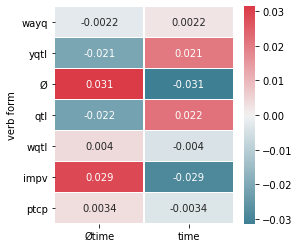

In [63]:
fig, ax = plt.subplots(figsize=(4, 4))
heatmap(verb_dp, ax=ax, annot=True, square=False)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_ylabel('verb form')
plt.show()

# By Rela

In [74]:
rela_ct = pivot_ct(
    cl_df,
    'has_time',
    'cl_rela',
)

rela_ct.index = ['Øtime', 'time']

rela_pr = rela_ct.div(rela_ct.sum(1), 0).round(2)

rela_ct

cl_rela,Main,SubAdv,SubMod,SubArg
Øtime,62204,13353,6685,2231
time,3055,369,168,56


In [75]:
rela_pr

cl_rela,Main,SubAdv,SubMod,SubArg
Øtime,0.74,0.16,0.08,0.03
time,0.84,0.10,0.05,0.02


In [76]:
rela_dp = sig.apply_deltaP(rela_ct, 0, 1)

rela_dp

cl_rela,Main,SubAdv,SubMod,SubArg
Øtime,-0.101068,0.056923,0.033085,0.01106
time,0.101068,-0.056923,-0.033085,-0.01106


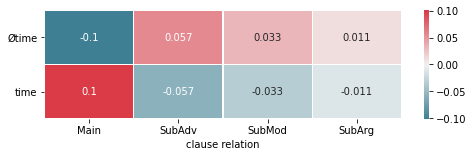

In [79]:
fig, ax = plt.subplots(figsize=(8, 2))
heatmap(rela_dp, ax=ax, annot=True, square=False)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xlabel('clause relation')
plt.show()

# By Type (main only)

In [43]:
htime_ct = pivot_ct(
    main_df,
    'has_time',
    'cl_type2',
)

htime_ct

cl_type2,Way0,NmCl,WayX,WQt0,xYq0,ZIm0,Ptcp,WxY0,xQt0,WXQt,...,WxYX,xIm0,WYqX,WxI0,WXIm,ZImX,XPos,XImp,WImX,xImX
has_time,,,,,,,,,,,,,,,,,,,,,
0,8451,8435,5578,4682,3161,2909,2438,2048,1581,1282,...,301,243,232,78,48,34,24,11,3,1
1,412,167,290,200,298,51,109,141,123,48,...,34,11,6,5,2,2,1,1,0,0


In [80]:
# run a fishers test
htime_dp = sig.apply_deltaP(htime_ct, 0, 1)
htime_dp

cl_type2,Way0,NmCl,WayX,WQt0,xYq0,ZIm0,Ptcp,WxY0,xQt0,WXQt,...,WxYX,xIm0,WYqX,WxI0,WXIm,ZImX,XPos,XImp,WImX,xImX
has_time,,,,,,,,,,,,,,,,,,,,,
0,-0.001733,0.088655,-0.007829,0.009497,-0.053904,0.033015,0.003148,-0.015652,-0.01732,0.005103,...,-0.007214,0.000264,0.001918,-0.000459,0.000116,-0.000134,0.000058,-0.000174,0.000054,0.000018
1,0.001733,-0.088655,0.007829,-0.009497,0.053904,-0.033015,-0.003148,0.015652,0.01732,-0.005103,...,0.007214,-0.000264,-0.001918,0.000459,-0.000116,0.000134,-0.000058,0.000174,-0.000054,-0.000018


In [82]:
# top assocs with time
htime_dp.loc[1].sort_values(ascending=False).head(25)

cl_type2
xYq0    0.053904
xQtX    0.035117
xYqX    0.034364
WxQX    0.019445
WxQ0    0.018070
xQt0    0.017320
WxY0    0.015652
WayX    0.007829
WxYX    0.007214
Way0    0.001733
WQtX    0.001023
WxI0    0.000459
XImp    0.000174
ZImX    0.000134
xImX   -0.000018
WImX   -0.000054
XPos   -0.000058
WXIm   -0.000116
xIm0   -0.000264
WYqX   -0.001918
Ptcp   -0.003148
XYqt   -0.003650
WXYq   -0.004274
ZYqX   -0.004505
WXQt   -0.005103
Name: 1, dtype: float64

In [83]:
# top negative assocs with time
htime_dp.loc[1].sort_values().head(25)

cl_type2
NmCl   -0.088655
ZIm0   -0.033015
WIm0   -0.011573
WYq0   -0.011346
WQt0   -0.009497
AjCl   -0.007952
ZQtX   -0.007818
XQtl   -0.007274
ZQt0   -0.006329
ZYq0   -0.005874
WXQt   -0.005103
ZYqX   -0.004505
WXYq   -0.004274
XYqt   -0.003650
Ptcp   -0.003148
WYqX   -0.001918
xIm0   -0.000264
WXIm   -0.000116
XPos   -0.000058
WImX   -0.000054
xImX   -0.000018
ZImX    0.000134
XImp    0.000174
WxI0    0.000459
WQtX    0.001023
Name: 1, dtype: float64

# With Subject

I've noticed a lot of `X` in the attractions above. Let's see if there is a prediction for 
subject with time.

In [38]:
cl_df.has_subj.value_counts()

0    53840
1    34281
Name: has_subj, dtype: int64

In [47]:
subj_ct = pivot_ct(
    cl_df,
    'has_time',
    'has_subj',
)

subj_pr = subj_ct.div(subj_ct.sum(1), 0)

subj_ct

has_subj,0,1
has_time,,
0,51427,33046
1,2413,1235


In [48]:
subj_pr

has_subj,0,1
has_time,,
0,0.608798,0.391202
1,0.661458,0.338542


In [49]:
subj_dp = sig.apply_deltaP(subj_ct, 0, 1)

subj_dp

has_subj,0,1
has_time,,
0,-0.05266,0.05266
1,0.05266,-0.05266


# By Function

In [36]:
main_df.function.value_counts()

simultaneous                                 1360
atelic_ext                                    443
anterior_dur                                  354
posterior                                     202
begin_to_end                                   42
posterior_dur                                  42
habitual                                       39
purposive_ext                                  27
simultaneous + atelic_ext                      21
anterior_dur_past?                             17
regular_recurrence                             15
anterior_dur_purposive                         15
multi_simuls                                   15
anterior                                       13
telic_ext                                      10
dist_fut                                        5
begin_to_end_habitual                           5
dur_to_end                                      5
simul_to_end                                    4
dist_posterior                                  4


In [51]:
function_ct = pivot_ct(
    main_df,
    'function',
    'verbform2',
)

# select primary functions of interest
select = [
    'simultaneous', 'atelic_ext', 'anterior_dur',
    'posterior', 'posterior_dur', 'begin_to_end',
    'habitual', 'telic_ext', 'anterior', 
]

function_ct = function_ct.loc[select]

print(function_ct.shape)

(9, 7)


In [52]:
function_ct

verbform2,yqtl,wayq,qtl,wqtl,Ø,ptcp,impv
function,,,,,,,
simultaneous,379,343,304,131,100,56,47
atelic_ext,106,154,98,44,18,13,10
anterior_dur,158,53,37,49,29,19,9
posterior,58,85,50,3,5,1,0
posterior_dur,1,4,27,0,5,5,0
begin_to_end,12,9,6,1,4,5,5
habitual,16,4,3,6,5,2,3
telic_ext,3,4,2,1,0,0,0
anterior,6,1,3,0,2,1,0


In [53]:
function_ct.size # N-datapoints

63

In [54]:
# fishers
function_fs, function_odds = sig.apply_fishers(function_ct, 0, 1)
function_dp = sig.apply_deltaP(function_ct, 0, 1)
function_dp2 = sig.apply_deltaP(function_ct.T, 0, 1)

df_highlighter(function_fs, rule='fishers')

,yqtl,wayq,qtl,wqtl,Ø,ptcp,impv
simultaneous,-1.275333,-0.660565,0.934850,0.167522,0.761915,0.036437,0.908597
atelic_ext,-2.314062,4.887235,0.216071,0.184563,-1.921604,-0.634516,-0.357826
anterior_dur,10.182000,-7.135320,-7.665332,2.518538,0.601069,0.719198,-0.133144
posterior,-0.059388,6.388548,0.681621,-5.438726,-2.096173,-2.582142,-2.438312
posterior_dur,-5.020401,-1.914102,8.869219,-1.537249,0.700048,1.584037,-0.197363
begin_to_end,0.000000,-0.224574,-0.465581,-0.754601,0.279880,1.584037,2.147601
habitual,0.941917,-1.587664,-1.341114,0.586590,0.741179,0.172799,0.974106
telic_ext,-0.000000,0.522009,0.000000,-0.000000,0.000000,0.000000,0.000000
anterior,0.652398,-0.689600,0.128342,-0.203932,0.667105,0.378545,0.000000


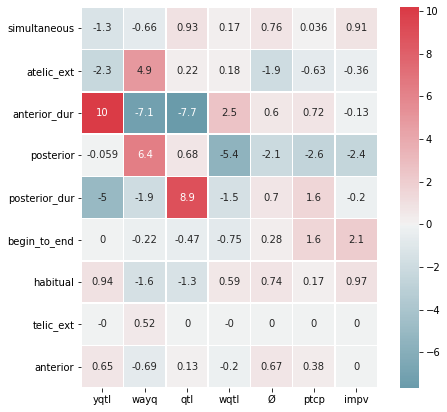

In [55]:
fig, ax = plt.subplots(figsize=(8, 7))
heatmap(function_fs.head(20), ax=ax, annot=True)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

In [56]:
ts.show(main_df[
    (main_df.verbform2 == 'Ø')
    & (main_df.function == 'habitual')
], extra=['cl_type'])

showing 5 of 5


,verse,clause,verb_utf8,cl_type
node,,,,
459272,2_Samuel 13:4,מַדּ֣וּעַ אַ֠תָּה כָּ֣כָה דַּ֤ל בַּבֹּ֣קֶר בַּבֹּ֔קֶר,nan,AjCl
505028,Lamentations 3:23,חֲדָשִׁים֙ לַבְּקָרִ֔ים,nan,AjCl
511846,1_Chronicles 23:30,וְכֵ֖ן לָעָֽרֶב׃,nan,NmCl
512040,1_Chronicles 26:17,לַצָּפֹ֤ונָה לַיֹּום֙ אַרְבָּעָ֔ה,nan,NmCl
512041,1_Chronicles 26:17,לַנֶּ֥גְבָּה לַיֹּ֖ום אַרְבָּעָ֑ה,nan,NmCl


In [57]:
function_dp

verbform2,yqtl,wayq,qtl,wqtl,Ø,ptcp,impv
function,,,,,,,
simultaneous,-0.035734,-0.022030,0.026149,0.005494,0.014141,0.001002,0.010978
atelic_ext,-0.067706,0.103692,0.011714,0.006694,-0.032113,-0.013817,-0.008464
anterior_dur,0.176221,-0.131082,-0.124676,0.051947,0.017300,0.015086,-0.004795
posterior,-0.008573,0.172420,0.039101,-0.085887,-0.046025,-0.038905,-0.032132
posterior_dur,-0.275825,-0.169886,0.438635,-0.095412,0.052868,0.079665,-0.030045
begin_to_end,-0.009454,-0.048808,-0.069892,-0.071197,0.028653,0.079665,0.091033
habitual,0.117069,-0.162237,-0.136783,0.060983,0.062106,0.010731,0.048132
telic_ext,0.005010,0.138277,-0.011623,0.006212,-0.067335,-0.040882,-0.029659
anterior,0.167397,-0.186319,0.019293,-0.094302,0.087233,0.036393,-0.029695


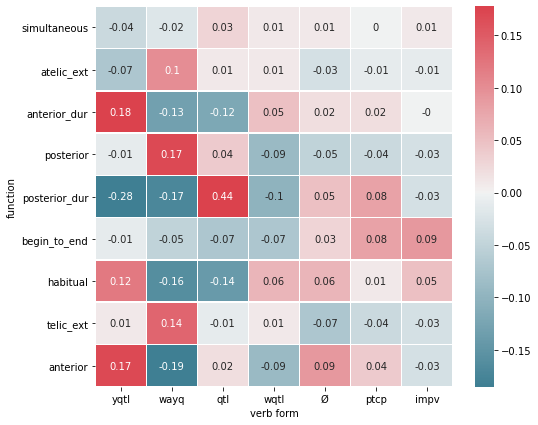

In [58]:
fig, ax = plt.subplots(figsize=(8, 7))
heatmap(function_dp.head(20).round(2), ax=ax, square=False, robust=True, annot=True)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xlabel('verb form')
plt.show()